In [12]:
import re
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

path = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/ours_mouse_brain.log'
int_blank_int = r"^\d+\s\d+$"
mapp_acc_score = r"^[0]\.\d+$" # r"^0(?:\.\d+)?$"


pair_ind_li = []
alpha_ind_li = []
mapp_acc_li = []
with open(path) as file_:
    for line in file_:
        if re.match(int_blank_int, line):
            pair_ind, alpha_ind = line.rstrip('\n').split(' ')
            pair_ind_li.append(pair_ind)
            alpha_ind_li.append(alpha_ind)
            # print(int(pair_ind), int(alpha_ind))
        if re.match(mapp_acc_score, line):
            mapp_acc = float(line)
            mapp_acc_li.append(mapp_acc)
            # print(mapp_acc)
            
result = pd.DataFrame({'pair_ind': pair_ind_li, 'alpha_ind': alpha_ind_li, 'mapp_acc': mapp_acc_li})
result['pair_ind'] = result['pair_ind'].astype('int')
result['alpha_ind'] = result['alpha_ind'].astype('int')
result['mapp_acc'] = result['mapp_acc'].astype('float')

([<matplotlib.axis.YTick at 0x23cccc86f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

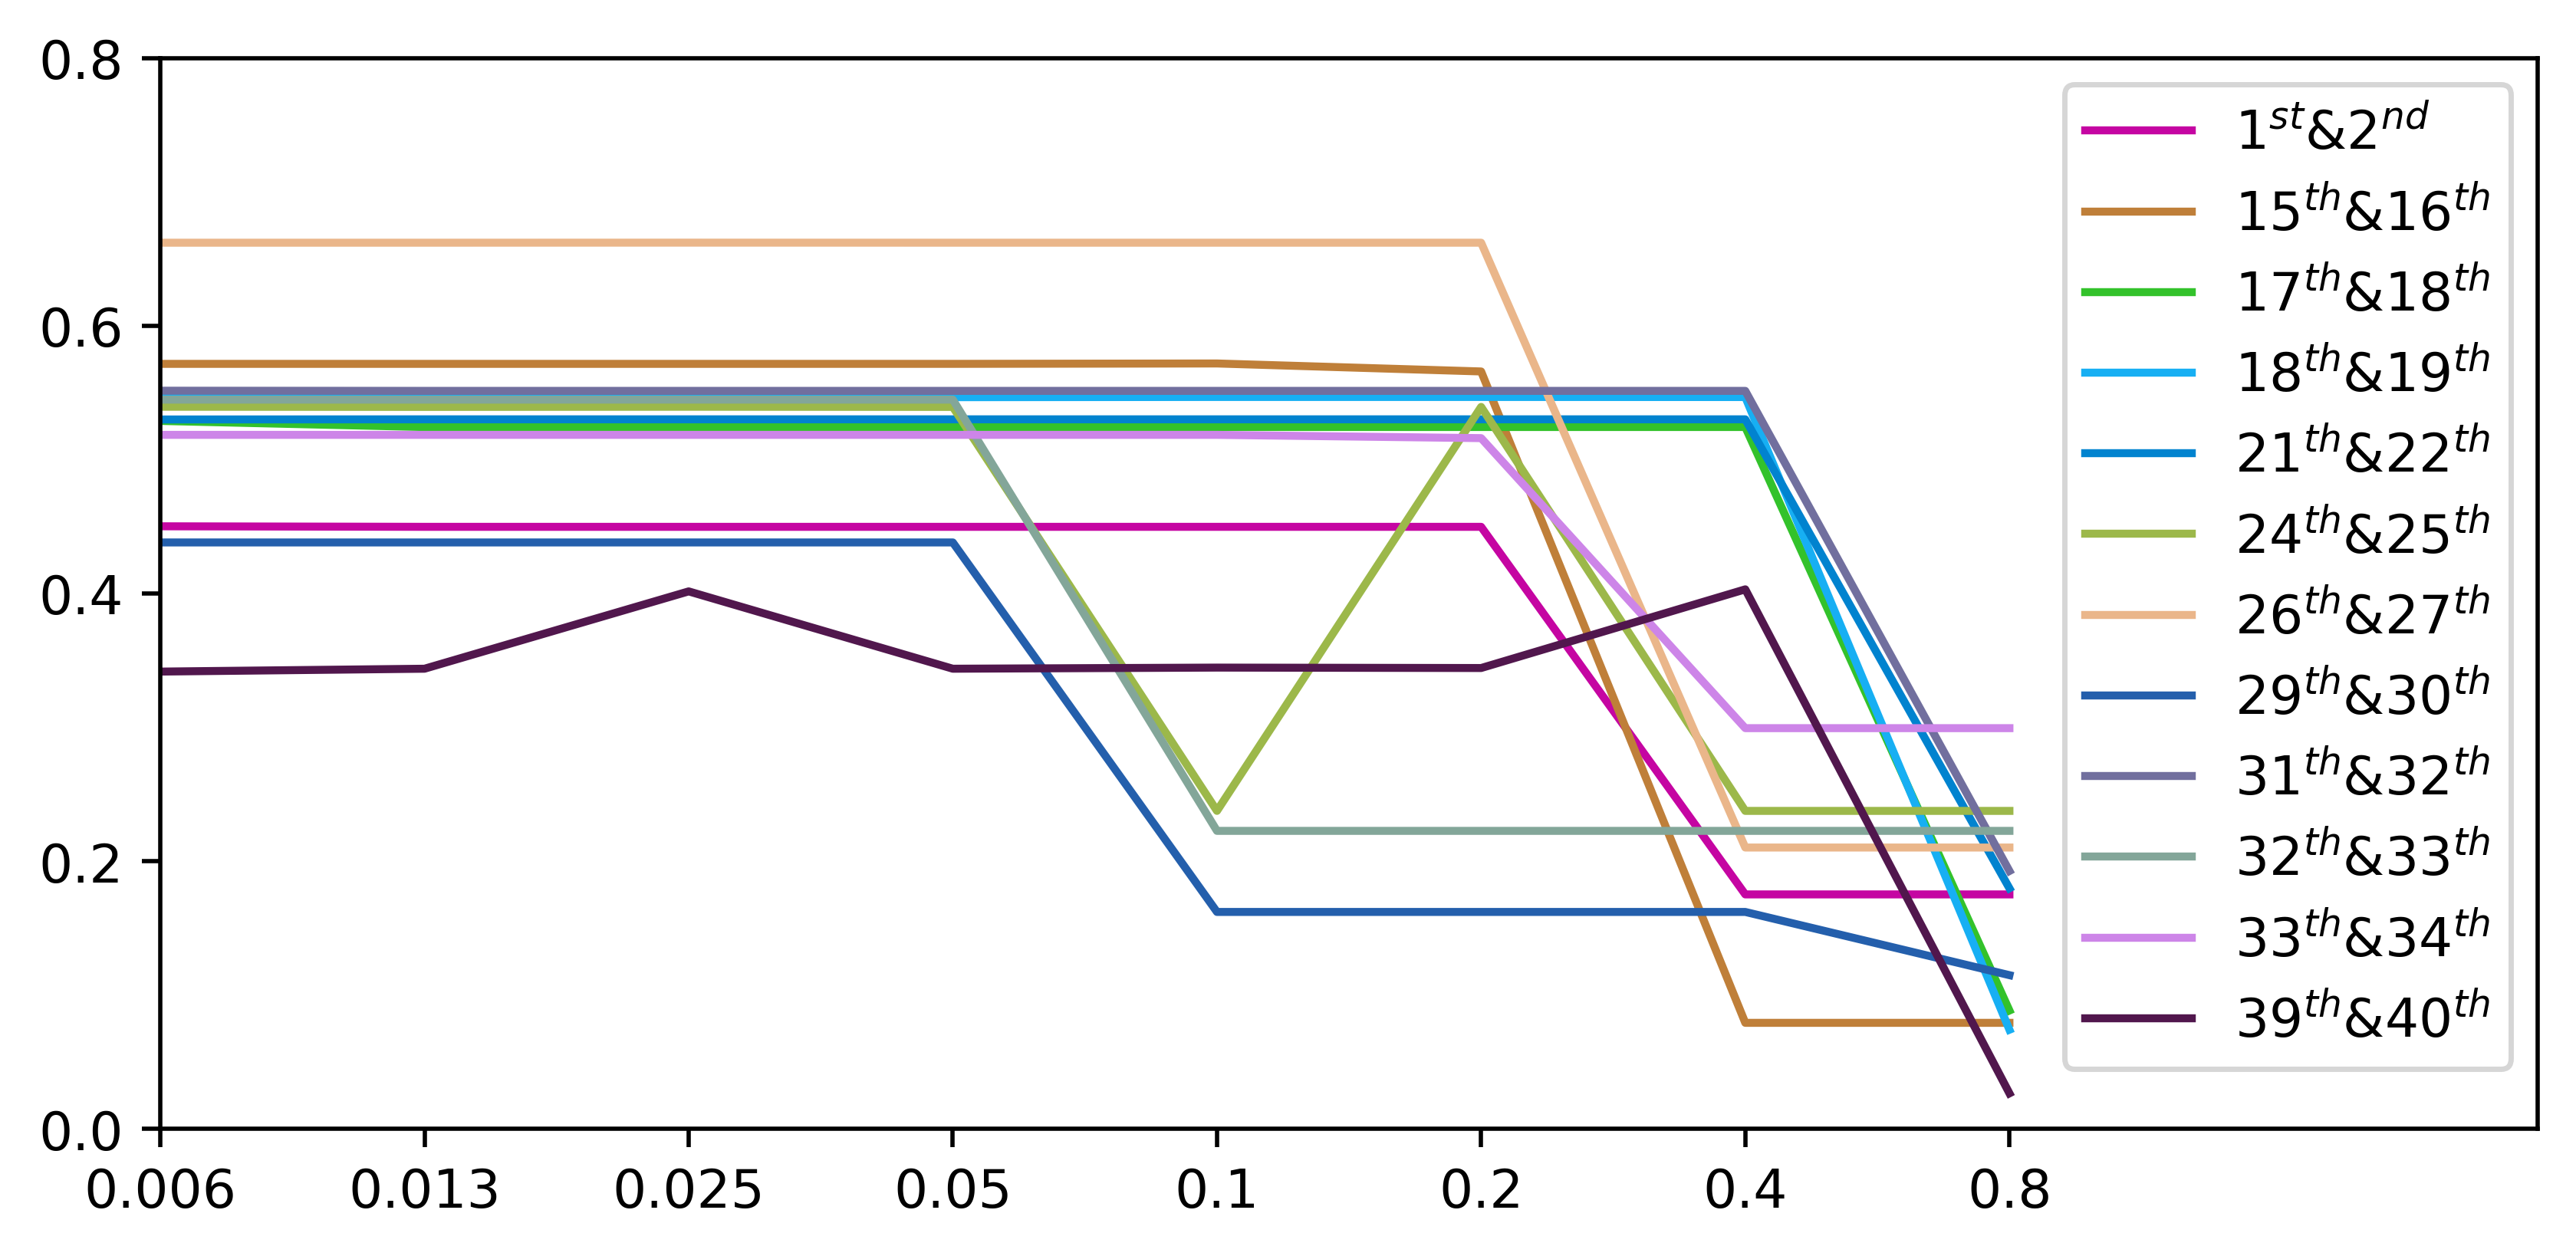

In [27]:
def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')
    
alpha_ind2label = {0:'0.8', 1:'0.4', 2: '0.2', 3:'0.1', 4:'0.05', 5:'0.025', 6:'0.013', 7:'0.006'}

alpha_indre2label = {(np.array(list(alpha_ind2label.keys())).max()-k):v for k,v in alpha_ind2label.items()}

np.random.seed(10)
color_li = mpl.colors.ListedColormap(np.random.rand(20, 3)).colors

result['alpha_ind_re'] = result['alpha_ind'].max() - result['alpha_ind'] 

plt.figure(figsize=(8, 3.7), dpi=500) # (8, 3.7) 
ind_co = -1
for pair_ind in list(dict.fromkeys(result['pair_ind'])):
    result_pair = result[result.pair_ind == pair_ind]
    acc_range = result_pair['mapp_acc'].max() - result_pair['mapp_acc'].min()
   
    if acc_range >=0.1:
        ind_co += 1
        plt.plot(result_pair['alpha_ind_re'], 
                 result_pair['mapp_acc'], 
                 label='&'.join([int2order(ind) for ind in [pair_ind+1, pair_ind+2]]),
                color=color_li[ind_co])
        plt.legend(ncol=1)

plt.xlim(0, 9)
plt.ylim(0, 0.8)
ticks_po = np.arange(result['alpha_ind_re'].min(), result['alpha_ind_re'].max()+1)
plt.xticks(ticks=ticks_po, labels=[alpha_indre2label[po] for po in ticks_po])
plt.yticks(ticks=np.arange(0, 1, 0.2))

None


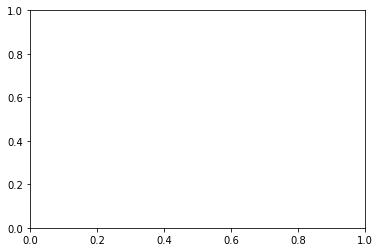

In [32]:
np.array(list(alpha_ind2label.keys())).max()

7